In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import calendar
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
data1=pd.read_csv('data_tp/properati-AR-2013-08-01-properties-sell.csv')
data2=pd.read_csv('data_tp/properati-AR-2014-02-01-properties-sell.csv')
data3=pd.read_csv('data_tp/properati-AR-2014-08-01-properties-sell.csv')
data4=pd.read_csv('data_tp/properati-AR-2015-02-01-properties-sell.csv')
data5=pd.read_csv('data_tp/properati-AR-2015-08-01-properties-sell.csv')
data6=pd.read_csv('data_tp/properati-AR-2016-02-01-properties-sell.csv')
data7=pd.read_csv('data_tp/properati-AR-2016-08-01-properties-sell.csv')
data8=pd.read_csv('data_tp/properati-AR-2017-02-01-properties-sell.csv')
data9=pd.read_csv('data_tp/properati-AR-2017-08-01-properties-sell.csv')


In [55]:
data_frames = [data1, data2,data3,data4,data5,data6,data7,data8,data9]
data = pd.concat(data_frames)

In [56]:
#Cuantos lugares (o provincias) reflejan los avisos
data['state_name'].value_counts()

Capital Federal                 78606
Bs.As. G.B.A. Zona Norte        74991
Bs.As. G.B.A. Zona Oeste        42015
Buenos Aires Costa Atlántica    37457
Bs.As. G.B.A. Zona Sur          28232
Córdoba                         24663
Santa Fe                        21276
Buenos Aires Interior            9546
Mendoza                          1936
Río Negro                        1885
Misiones                         1714
Neuquén                          1683
Entre Ríos                       1626
Tucumán                          1133
San Luis                          762
Salta                             707
Corrientes                        693
La Pampa                          620
Chubut                            446
Catamarca                         334
Chaco                             173
San Juan                          138
Tierra Del Fuego                  134
Jujuy                              80
Santa Cruz                         69
Formosa                            66
La Rioja    

In [57]:
# Filtro por Capital Federal y GBA
data = data.loc[(data.state_name=='Capital Federal') | (data.state_name.str.contains('G.B.A'))]

# Número total de ambientes de los departamentos en venta

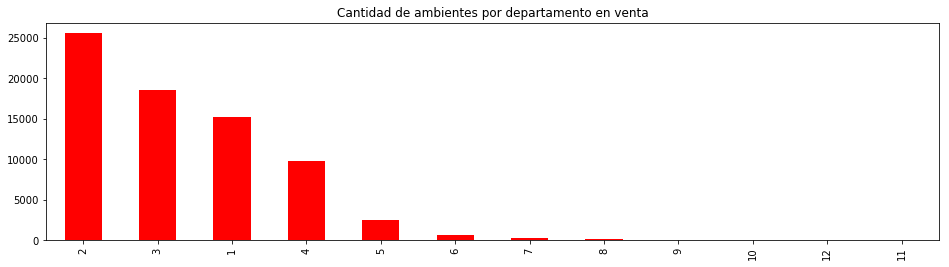

In [58]:
rooms_per_apartment = data.loc[(data.property_type=='apartment') & (data.rooms<13) ,['property_type','rooms']].dropna()
rooms_per_apartment['rooms'].astype(int).value_counts().plot(kind='bar',figsize=(16,4), title="Cantidad de ambientes por departamento en venta",color='red');

# Superficie total promedio a través del tiempo

In [59]:
grouped = data[['property_type','surface_total_in_m2','created_on']].dropna()
grouped.created_on = pd.to_datetime(grouped.created_on, format='%Y/%m/%d')
Prop_TotalSurf =grouped[['property_type','surface_total_in_m2']]
Prop_TotalSurf['Periodo'] = grouped['created_on'].map(lambda x: x.strftime('%Y-%m'))
#En algunos casos la superficie total era demasiada
#decidí tomar el promedio dentro de un rango de valores más o menos "usual"
Prop_TotalSurf = Prop_TotalSurf.loc[((Prop_TotalSurf.surface_total_in_m2<1000) &\
                                     (Prop_TotalSurf.surface_total_in_m2>100) &\
                                    (Prop_TotalSurf.property_type== 'house')) |\
                                    ((Prop_TotalSurf.surface_total_in_m2<500) &\
                                    ((Prop_TotalSurf.property_type== 'apartment')|\
                                     (Prop_TotalSurf.property_type== 'PH')) &\
                                    (Prop_TotalSurf.surface_total_in_m2>18))\
                                   ]


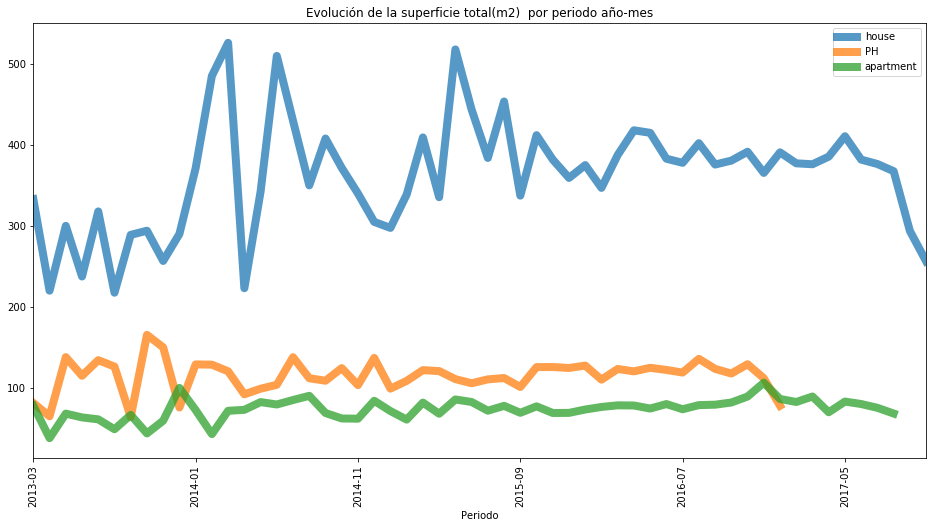

In [60]:

plt.figure()

Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('house'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='house',title='Evolución de la superficie total(m2) por periodo año-mes');

Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('PH'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='PH',title='Evolución de la superficie total(m2)  por periodo año-mes')

Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('apartment'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='apartment',title='Evolución de la superficie total(m2)  por periodo año-mes')
plt.legend();


# Cuántas propiedades nuevas fueron publicadas

In [61]:
new_prop = data.loc[(data.description.str.contains('nuevo') |data.description.str.contains('estrenar'))\
         , ['state_name','created_on','currency','rooms','property_type','surface_total_in_m2']]


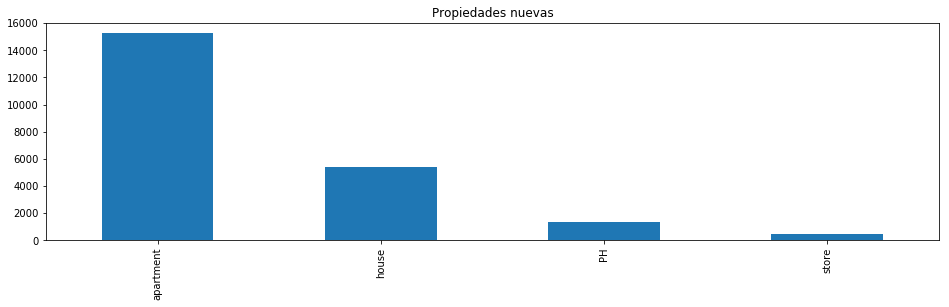

In [62]:
new_prop['property_type'].value_counts()[0:19].plot(kind='bar',figsize=(16,4), title="Propiedades nuevas");

In [63]:
#Qué cantidad de estas propiedades nuevas tiene precio fijado en USD
new_prop.currency.value_counts()

USD    19600
ARS      680
Name: currency, dtype: int64

# Dónde hubo más venta de propiedades nuevas

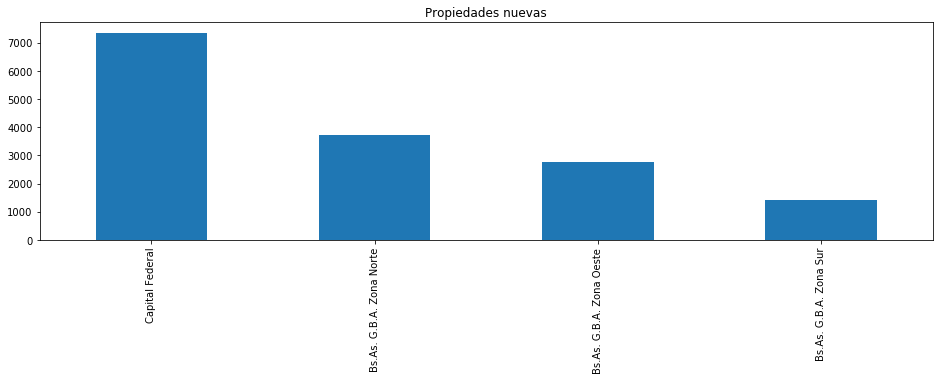

In [64]:
new_prop_state = new_prop.loc[new_prop.property_type == 'apartment']
new_prop_state['state_name'].value_counts()[0:19].plot(kind='bar',figsize=(16,4), title="Propiedades nuevas");

# Cuál fue la cantidad de ambientes de los departamentos nuevos en CABA

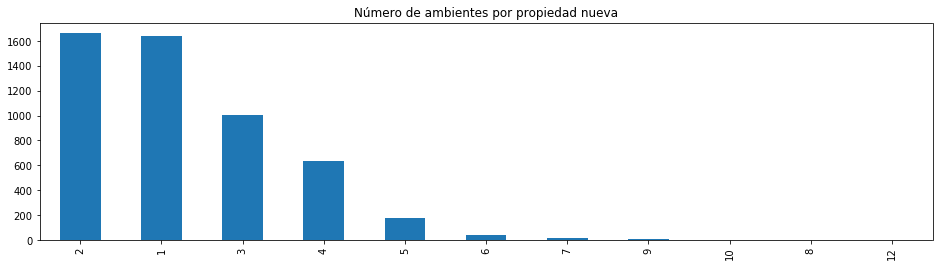

In [65]:
new_prop_CABA_rooms = new_prop.loc[(new_prop.state_name == 'Capital Federal') & \
                                   (new_prop.property_type == 'apartment'),['rooms','property_type']].dropna()
new_prop_CABA_rooms['rooms'].astype(int).value_counts().plot(kind='bar',figsize=(16,4), title="Número de ambientes por propiedad nueva");

# Cuál fue el tamaño en m2 de los departamentos nuevos de 1 ambiente en CABA

In [66]:
new_prop.created_on = pd.to_datetime(new_prop.created_on, format='%Y/%m/%d')
new_prop['Periodo'] = new_prop['created_on'].map(lambda x: x.strftime('%Y-%m'))

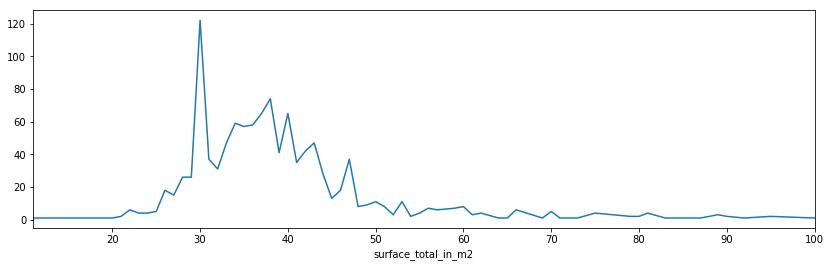

In [67]:
new_1caba =new_prop.loc[(new_prop.rooms==1) & (new_prop.surface_total_in_m2<101) &\
             (new_prop.state_name=='Capital Federal') &\
            (new_prop.surface_total_in_m2>10)]
new_1caba.groupby('surface_total_in_m2').count()['property_type'].plot(figsize=(14,4))

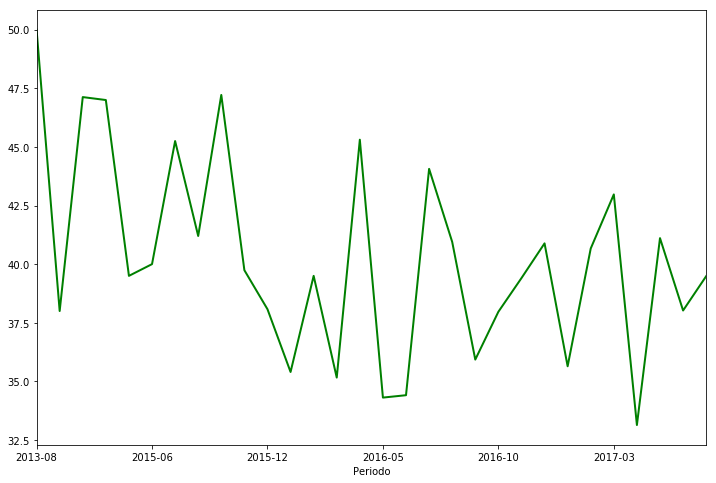

In [68]:
#Promedio de superficie total en m2 a través del tiempo
new_1caba.groupby('Periodo').mean().loc[:,'surface_total_in_m2'].plot(linewidth=2,figsize=(12,8),color='green');

# Evolución de la superficie total promedio en m2 de los departamentos nuevos de 2 ambientes en G.B.A

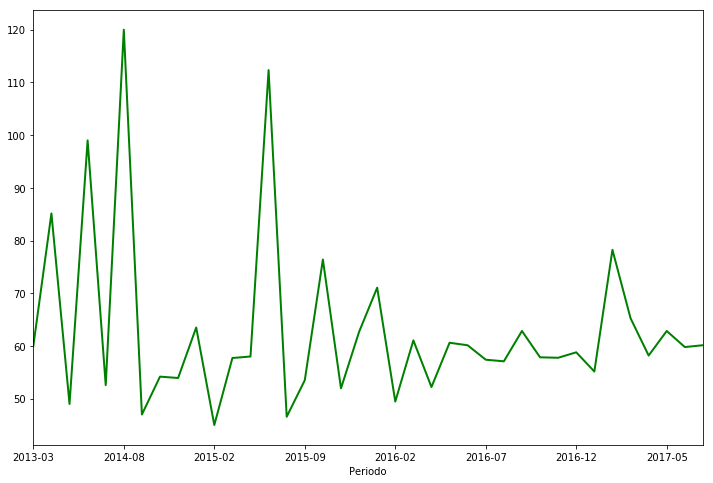

In [69]:
new_2gba =new_prop.loc[(new_prop.rooms==2) & (new_prop.surface_total_in_m2<300) &\
             (new_prop.state_name.str.contains('G.B.A')) &\
            (new_prop.surface_total_in_m2>40)]
new_2gba.groupby('Periodo').mean().loc[:,'surface_total_in_m2'].plot(linewidth=2,figsize=(12,8),color='green');

# Top 20 Lugares más baratos


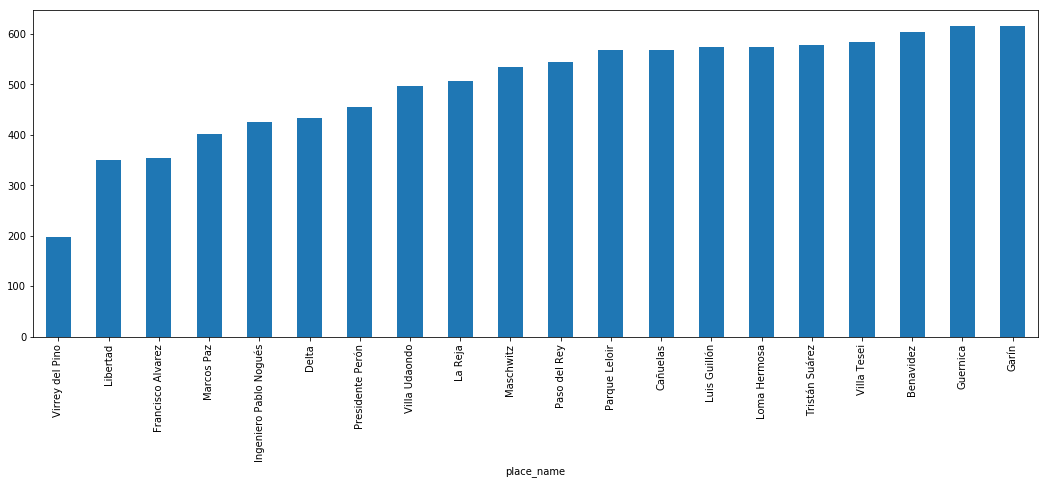

In [70]:
grouped = data.loc[(data.place_name!=None ) & ( ~data.place_name.str.contains('Zona',na=False) ) & (data.price_usd_per_m2!=None)]
grouped = grouped.groupby('place_name').agg([np.size, np.mean])
# por lo menos 50 ventas
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 50, : ][('price_usd_per_m2','mean')].sort_values(ascending=True)[0:20].plot(kind='bar',figsize=(18,6));

In [71]:
#De cuántos ambientes son las casas ofrecidas en Gran Buenos Aires
gba= data.loc[(data.property_type == 'house') & (data.rooms<13) & (data.state_name.str.contains('G.B.A')),\
             ['created_on','price_usd_per_m2','place_name','rooms']]
gba.created_on = pd.to_datetime(gba.created_on, format='%Y/%m/%d')
gba['Periodo'] = gba['created_on'].map(lambda x: x.strftime('%Y-%m'))
gba.rooms.value_counts()

4.0     8428
3.0     6883
5.0     5131
6.0     1868
2.0     1405
7.0      811
1.0      275
8.0      274
9.0       95
10.0      91
11.0      18
12.0      12
Name: rooms, dtype: int64

In [72]:
gba = gba.loc[gba.rooms==4,:] #me quedo con la cantidad mas significativa
gba.place_name.value_counts()

Ramos Mejía                      762
Ituzaingó                        462
Haedo                            400
Tigre                            331
Pilar                            258
Nordelta                         241
La Plata                         233
Escobar                          223
Villa Luzuriaga                  178
Olivos                           173
General San Martín               156
Morón                            153
Quilmes                          144
San Justo                        139
Villa Ballester                  136
Caseros                          135
Tres de Febrero                  120
Castelar                         113
Los Pingüinos Country Club       106
Moreno                            99
Martínez                          97
Merlo                             96
Villa Sarmiento                   93
Vicente López                     92
Benavidez                         92
Bs.As. G.B.A. Zona Norte          77
El Palomar                        73
B

In [73]:
selected_places_gba = gba.loc[(gba.place_name == 'Ramos Mejía') | \
                                        (gba.place_name == 'Haedo' ) | \
                                        (gba.place_name == 'Ituzaingó') | \
                                        (gba.place_name== 'Tigre') | \
                                        (gba.place_name== 'Pilar') | \
                                        (gba.place_name== 'Escobar'),\
                                        ['place_name','price_usd_per_m2','Periodo']].\
                                        pivot_table(index='Periodo',columns='place_name')
selected_places_gba

price_usd_per_m2                                         \
place_name          Escobar        Haedo    Ituzaingó        Pilar   
Periodo                                                              
2013-05                 NaN          NaN          NaN  1063.842871   
2013-07                 NaN          NaN          NaN          NaN   
2013-11                 NaN          NaN          NaN          NaN   
2014-01                 NaN          NaN          NaN          NaN   
2014-03                 NaN          NaN   340.909091          NaN   
2014-04                 NaN          NaN   309.090909          NaN   
2014-05         2750.000000          NaN          NaN          NaN   
2014-07                 NaN          NaN   821.623932          NaN   
2014-08         3250.000000          NaN          NaN          NaN   
2014-09                 NaN          NaN          NaN          NaN   
2014-10                 NaN          NaN   187.500000          NaN   
2014-11                 NaN   990.779186          NaN          NaN   
2014-12                 NaN          NaN   314.009662          NaN   
2015-01          378.947368  1066.666667   344.795322          NaN   
2015-02                 NaN  1166.666667          NaN          NaN   
2015-03                 NaN  1198.076923   460.000000          NaN   
2015-04                 NaN  1060.606061   654.008439          NaN   
2015-05                 NaN          NaN   388.333333          NaN   
2015-06                 NaN          NaN   400.000000  1662.500000   
2015-07                 NaN  1209.504421   545.136570          NaN   
2015-08                 NaN   734.547206   816.666667  1406.973645   
2015-09          546.666667  1311.818911   856.023433  1720.383528   
2015-10                 NaN  1139.531521   500.000000  1118.684514   
2015-11         1250.000000   987.089566   431.227619  1117.916667   
2015-12         1150.800309   801.427346   923.076923          NaN   
2016-01         1022.727273  1274.390107   870.090820   967.922257   
2016-02          517.596435  1391.345274   958.413863  1100.000000   
2016-03         1251.736111  1498.165785   820.499350  1012.912088   
2016-04          863.333333  1295.755503  1169.988074   976.323351   
2016-05                 NaN  1009.163963   600.962678   450.000000   
2016-06         1132.948125  1133.520173  1281.250000  1346.018365   
2016-07          350.644343  1111.757165   678.476831  1452.093772   
2016-08          938.326574  1448.442016   813.076267  1003.099304   
2016-09          542.449042  2489.953323   725.217744   736.877947   
2016-10          900.000000  1153.413658  1196.933072   772.302761   
2016-11          348.611111  1373.135443   827.090365          NaN   
2016-12                 NaN  1355.317254   973.062016  1027.666999   
2017-01         1210.919621  1002.351735   644.444444   804.641975   
2017-02          726.894185  1169.568130   981.125874   677.966102   
2017-03                 NaN  1385.521886   549.594659   383.333333   
2017-04          316.062176  1467.594905   476.960130   314.285714   
2017-05                 NaN  1347.777113   539.750730   405.405405   
2017-06                 NaN   867.385241   633.333333   445.000000   
2017-07          203.547758  2744.515053   878.917910   500.000000   

                                      
place_name  Ramos Mejía        Tigre  
Periodo                               
2013-05             NaN  1205.357143  
2013-07     1867.469880          NaN  
2013-11             NaN          NaN  
2014-01             NaN   440.285235  
2014-03             NaN          NaN  
2014-04             NaN          NaN  
2014-05             NaN          NaN  
2014-07             NaN          NaN  
2014-08             NaN          NaN  
2014-09             NaN  1481.481333  
2014-10             NaN          NaN  
2014-11      555.555556   883.620690  
2014-12     1142.857143          NaN  
2015-01             NaN   878.656380  
2015-02             NaN   627.004110  
2015-03           

In [74]:
selected_places_gba.columns = selected_places_gba.columns.droplevel()
meds = selected_places_gba.median()
selected_places_gba = selected_places_gba[meds.index]

In [75]:
meds.sort_values(ascending=False)

place_name
Ramos Mejía    1334.864035
Haedo          1183.822527
Pilar           989.711328
Tigre           909.342968
Escobar         881.666667
Ituzaingó       654.008439
dtype: float64

In [76]:
Media_price = gba.loc[(gba.place_name == 'Ramos Mejía') | \
                                        (gba.place_name == 'Haedo' ) | \
                                        (gba.place_name == 'Ituzaingó') | \
                                        (gba.place_name== 'Tigre') | \
                                        (gba.place_name== 'Pilar') | \
                                        (gba.place_name== 'Escobar'),
                                        ['price_usd_per_m2']].mean()
Media_price

price_usd_per_m2    1162.025162
dtype: float64

# Cuánto varía el precio en usd por m2 de las casas en G.B.A ?

[None]

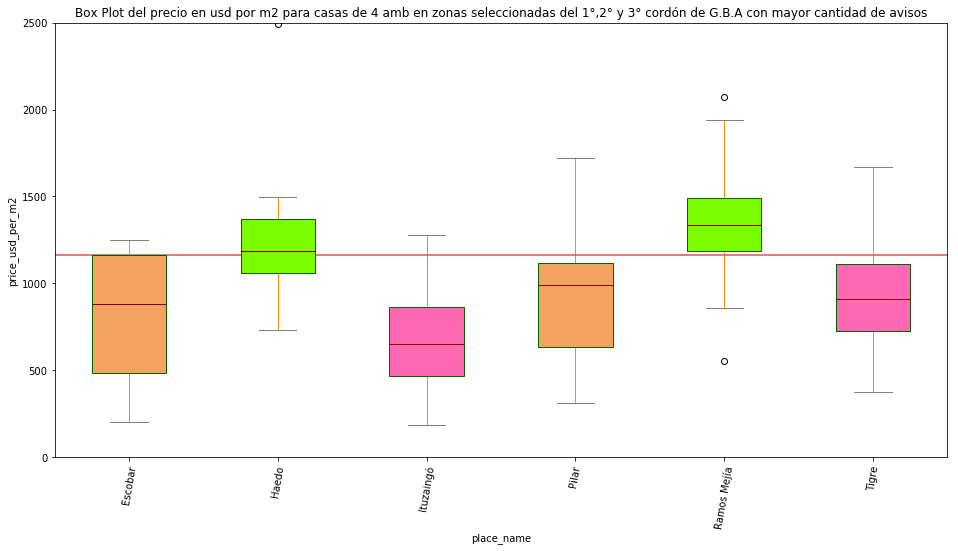

In [77]:
props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkRed", caps="Gray")
boxplot=selected_places_gba.plot.box(return_type='dict', figsize=(16,8),rot=80,title='Box Plot del precio en usd por m2 para casas de 4 amb en zonas seleccionadas del 1°,2° y 3° cordón de G.B.A con mayor cantidad de avisos',color=props, patch_artist=True);

ax=plt.gca()
ax.set_ylim([0,2500]);
ax.set_ylabel('price_usd_per_m2');
ax.set_xlabel('place_name');
plt.axhline(Media_price.price_usd_per_m2,color=sns.xkcd_rgb["pale red"])

boxplot['boxes'][0].set( facecolor = 'sandybrown' )
boxplot['boxes'][3].set( facecolor = 'sandybrown' )
boxplot['boxes'][1].set( facecolor = 'lawngreen' )
boxplot['boxes'][4].set( facecolor = 'lawngreen' )
boxplot['boxes'][2].set( facecolor = 'hotpink' )
boxplot['boxes'][5].set( facecolor = 'hotpink' )


In [78]:
#De cuántos ambientes son las casas ofrecidas en Capital Federal
caba= data.loc[(data.property_type == 'house') & (data.rooms<13) & (data.state_name.str.contains('Capital')),\
             ['created_on','price_usd_per_m2','place_name','rooms']]
caba.created_on = pd.to_datetime(caba.created_on, format='%Y/%m/%d')
caba['Periodo'] = caba['created_on'].map(lambda x: x.strftime('%Y-%m'))
caba.rooms.value_counts()

5.0     661
4.0     569
6.0     319
3.0     213
7.0     156
1.0      65
2.0      51
8.0      38
10.0     18
9.0      18
11.0     15
12.0      7
Name: rooms, dtype: int64

In [79]:
caba = caba.loc[caba.rooms==4,:] 
caba.place_name.value_counts()

Villa Devoto           53
Mataderos              40
Flores                 37
Floresta               26
Liniers                26
Villa del Parque       25
Villa Urquiza          24
Saavedra               22
Palermo                21
Caballito              21
Barracas               20
Belgrano               20
Capital Federal        18
Villa Lugano           17
Nuñez                  15
Colegiales             14
Villa Pueyrredón       13
Parque Avellaneda      11
Boedo                  11
Villa Luro             10
Parque Patricios       10
Pompeya                10
Villa Crespo            9
Abasto                  9
Almagro                 8
Villa Real              8
Versalles               7
Parque Chacabuco        7
Chacarita               5
Paternal                5
Monte Castro            4
Villa Ortuzar           4
San Nicolás             3
Villa General Mitre     3
Boca                    3
Villa Santa Rita        3
Balvanera               3
Barrio Norte            3
Coghlan     

In [80]:
selected_places_caba = caba.loc[(caba.place_name == 'Villa Devoto') | \
                                        (caba.place_name == 'Mataderos') | \
                                        (caba.place_name== 'Flores') | \
                                        (caba.place_name== 'Liniers') | \
                                        (caba.place_name== 'Floresta'),\
                                        ['place_name','price_usd_per_m2','Periodo']].\
                                        pivot_table(index='Periodo',columns='place_name')
selected_places_caba

price_usd_per_m2                                         \
place_name           Flores     Floresta      Liniers    Mataderos   
Periodo                                                              
2013-07                 NaN          NaN          NaN  1327.160494   
2015-09                 NaN          NaN  1084.033613   932.642487   
2015-10                 NaN          NaN          NaN          NaN   
2015-11                 NaN          NaN          NaN          NaN   
2015-12                 NaN          NaN          NaN          NaN   
2016-01                 NaN          NaN          NaN          NaN   
2016-02                 NaN  1500.000000          NaN          NaN   
2016-03                 NaN          NaN  1000.000000  1117.251462   
2016-04                 NaN   891.304348  1125.000000   813.953488   
2016-05         1315.789474          NaN          NaN  1666.666667   
2016-06         1904.761905          NaN          NaN          NaN   
2016-07                 NaN          NaN  1586.538462  1248.693152   
2016-08                 NaN  1666.666667          NaN  1296.875000   
2016-09                 NaN          NaN   727.272727          NaN   
2016-10         1515.267176          NaN          NaN  1090.730859   
2016-11                 NaN          NaN          NaN          NaN   
2016-12                 NaN          NaN  1637.426901  1531.914894   
2017-01         1315.789474  1156.250000  1069.518717          NaN   
2017-02         1172.413793          NaN   827.083333   900.000000   
2017-03                 NaN          NaN          NaN   842.105263   
2017-04         1526.315789  1239.969136  1492.463235   796.482249   
2017-05                 NaN   537.500000          NaN  1702.127660   
2017-06                 NaN          NaN  1277.777778          NaN   
2017-07                 NaN          NaN   761.589404   808.195911   

                         
place_name Villa Devoto  
Periodo                  
2013-07             NaN  
2015-09             NaN  
2015-10             NaN  
2015-11     1238.405797  
2015-12             NaN  
2016-01             NaN  
2016-02             NaN  
2016-03     1177.833380  
2016-04     1657.340194  
2016-05             NaN  
2016-06             NaN  
2016-07             NaN  
2016-08     1920.489962  
2016-09             NaN  
2016-10     1800.000000  
2016-11             NaN  
2016-12             NaN  
2017-01             NaN  
2017-02     1479.964718  
2017-03     1955.555556  
2017-04             NaN  
2017-05     2281.794872  
2017-06             NaN  
2017-07     2909.090909

In [81]:
selected_places_caba.columns = selected_places_caba.columns.droplevel()
meds = selected_places_caba.median()
selected_places_caba = selected_places_caba[meds.index]

In [82]:
meds.sort_values(ascending=False)

place_name
Villa Devoto    1800.000000
Flores          1415.528325
Floresta        1198.109568
Mataderos       1103.991161
Liniers         1084.033613
dtype: float64

In [83]:
Media_price = caba.loc[(caba.place_name == 'Liniers') | \
                                        (caba.place_name == 'Villa Devoto') | \
                                        (caba.place_name== 'Floresta') | \
                                        (caba.place_name== 'Mataderos') | \
                                        (caba.place_name== 'Flores'),
                                        ['price_usd_per_m2']].mean()
Media_price

price_usd_per_m2    1351.87802
dtype: float64

# Cuánto varía el precio en usd por m2 de las casas en CABA ?

[None]

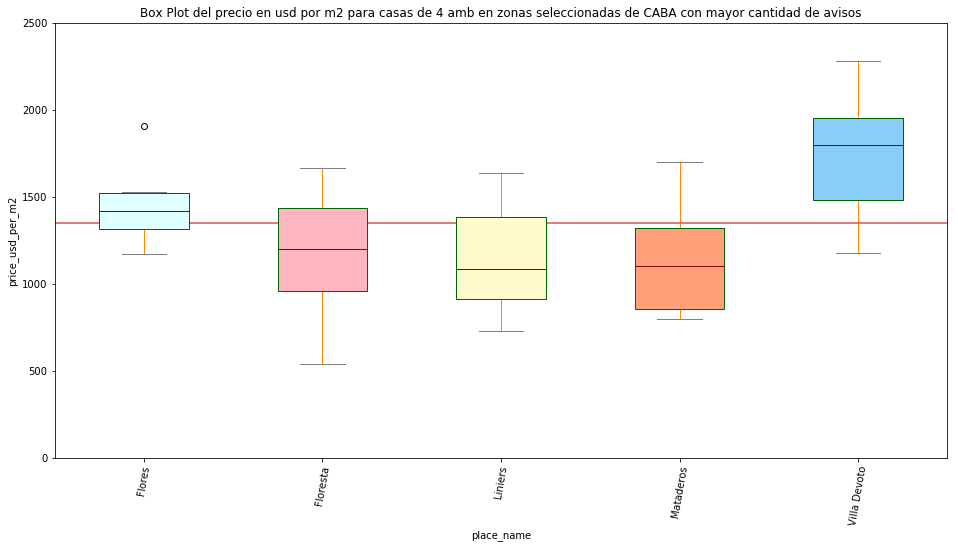

In [84]:
props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkRed", caps="Gray")
boxplot=selected_places_caba.plot.box(return_type='dict', figsize=(16,8),rot=80,title='Box Plot del precio en usd por m2 para casas de 4 amb en zonas seleccionadas de CABA con mayor cantidad de avisos',color=props, patch_artist=True);

ax=plt.gca()
ax.set_ylim([0,2500]);
ax.set_ylabel('price_usd_per_m2');
ax.set_xlabel('place_name');
plt.axhline(Media_price.price_usd_per_m2,color=sns.xkcd_rgb["pale red"])

boxplot['boxes'][0].set( facecolor = 'lightcyan' )
boxplot['boxes'][3].set( facecolor = 'lightsalmon' )
boxplot['boxes'][1].set( facecolor = 'lightpink' )
boxplot['boxes'][4].set( facecolor = 'lightskyblue' )
boxplot['boxes'][2].set( facecolor = 'lemonchiffon' )


In [85]:
data.head(3)

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,Argentina,2015-08-01,USD,CODIGO: 1558-131 ubicado en: RICARDO GUTIERREZ...,NaN,NaN,NaN,3429617.0,3e2446d022edbd77a04ff90ee1337956608c6b92,https://thumbs4.properati.com/5/pTRzbqbkWmxvuh...,...,1093.75000,NaN,http://www.properati.com.ar/sd2w_venta_casa_ra...,house,NaN,Bs.As. G.B.A. Zona Oeste,448.0,NaN,NaN,Chalet 6 ambientes en Ramos Mejìa
1,Argentina,2015-08-01,NaN,"Triplex interno. PB. liv-comd, coc-sep. c/ mu...",NaN,NaN,NaN,3432039.0,9165205958b7b38d5ef01e62c175b32e71fa4d43,https://thumbs4.properati.com/5/VOgny2mIj0m2Dr...,...,NaN,NaN,http://www.properati.com.ar/sd3e_venta_departa...,apartment,NaN,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,29 esq 64 1500
2,Argentina,2015-08-01,USD,Departamento Triplex en venta Las Cañitas Belg...,9800,NaN,15.0,3436077.0,ddc7f96b844e6e0f427a42db747ad8ff207c944a,https://thumbs4.properati.com/9/pxHhGP47Vv6vmj...,...,2629.87013,1942.446043,http://www.properati.com.ar/sdc0_venta_departa...,apartment,5.0,Capital Federal,308.0,NaN,417.0,DEPARTAMENTO EN VENTA


# Relación entre número de piso y valor de expensas

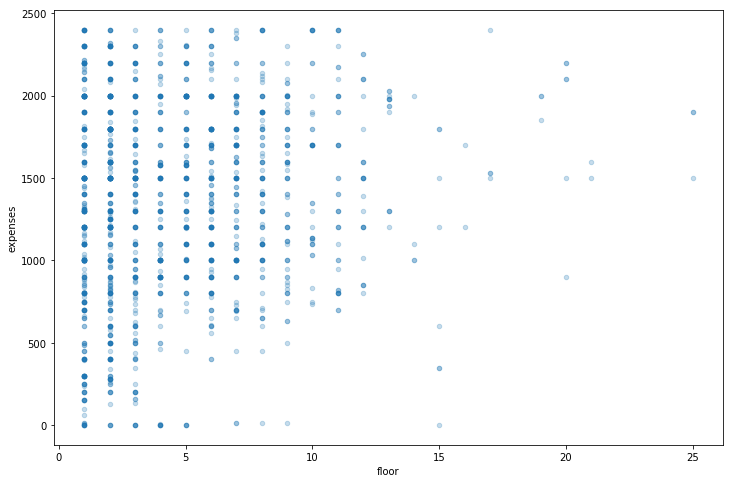

In [86]:

floor_vs_exp = data.loc[data.state_name=='Capital Federal',['expenses','floor']].dropna()
floor_vs_exp.expenses = floor_vs_exp.expenses.astype(int)
floor_vs_exp = floor_vs_exp.loc[(floor_vs_exp.expenses<2500)]
floor_vs_exp.plot.scatter('floor','expenses',alpha=0.25,figsize=(12,8));